In [90]:
import pandas as pd
doc=pd.read_csv("used3.csv")
doc

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,name,review,index,Category
0,0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",0,Baby_Care
1,1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,1,Diapering
2,2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,2,Nursery
3,3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,3,Baby_Care
4,4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,4,Baby_Care
...,...,...,...,...,...
293,295,Arm's Reach Original Co-sleeper 100% Cotton Wh...,I would recommend getting cheaper sheets made ...,295,Baby_Care
294,296,Arm's Reach Original Co-sleeper 100% Cotton Wh...,This is a must for anyone who is buying the Co...,296,Baby_Care
295,297,Arm's Reach Original Co-sleeper 100% Cotton Wh...,love having her so close!!!!!! allows for goo...,297,Baby_Care
296,298,Arm's Reach Original Co-sleeper 100% Cotton Wh...,We love this full sized co-sleeper that can at...,298,Baby_Care


In [91]:
# doc['Category'].value_counts()
doc1=doc.groupby('Category').count()
doc1.sort_values(by=['name'],ascending=False)

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,name,review,index
Category,,,,
Baby_toddler_toys,82,82,82,82
Baby_Care,73,73,73,73
Baby_stationary,39,39,39,39
Gift,38,38,38,38
Nursery,35,35,35,35
Diapering,14,14,14,14
Activity_entertainment,13,13,13,13
Apparel_accessories,4,4,4,4


In [92]:
data_text=doc[["review","Category"]]
data_text['index']=data_text.index

documents=data_text

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-92-318acfee2307>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['index']=data_text.index


In [93]:
documents

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review,Category,index
0,"These flannel wipes are OK, but in my opinion ...",Baby_Care,0
1,it came early and was not disappointed. i love...,Diapering,1
2,Very soft and comfortable and warmer than it l...,Nursery,2
3,This is a product well worth the purchase. I ...,Baby_Care,3
4,All of my kids have cried non-stop when I trie...,Baby_Care,4
...,...,...,...
293,I would recommend getting cheaper sheets made ...,Baby_Care,293
294,This is a must for anyone who is buying the Co...,Baby_Care,294
295,love having her so close!!!!!! allows for goo...,Baby_Care,295
296,We love this full sized co-sleeper that can at...,Baby_Care,296


In [94]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import nltk.stem as stemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /Users/deth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [95]:
stemmer=PorterStemmer()
def lemmatize_stemming(text):
      return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >3:
              result.append(lemmatize_stemming(token))
  
    return result

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
doc_sample=documents[documents['index']==4].values[0][0]
print('original document')
words=[]
for word in doc_sample.split(' '):
      words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document
['All', 'of', 'my', 'kids', 'have', 'cried', 'non-stop', 'when', 'I', 'tried', 'to', 'ween', 'them', 'off', 'their', 'pacifier,', 'until', 'I', 'found', 'Thumbuddy', 'To', "Love's", 'Binky', 'Fairy', 'Puppet.', '', 'It', 'is', 'an', 'easy', 'way', 'to', 'work', 'with', 'your', 'kids', 'to', 'allow', 'them', 'to', 'understand', 'where', 'their', 'pacifier', 'is', 'going', 'and', 'help', 'them', 'part', 'from', 'it.This', 'is', 'a', 'must', 'buy', 'book,', 'and', 'a', 'great', 'gift', 'for', 'expecting', 'parents!!', '', 'You', 'will', 'save', 'them', 'soo', 'many', 'headaches.Thanks', 'for', 'this', 'book!', '', 'You', 'all', 'rock!!']


 tokenized and lemmatized document: 
['kid', 'cri', 'stop', 'tri', 'ween', 'pacifi', 'thumbuddi', 'love', 'binki', 'fairi', 'puppet', 'easi', 'work', 'kid', 'allow', 'understand', 'pacifi', 'go', 'help', 'book', 'great', 'gift', 'expect', 'parent', 'save', 'headach', 'thank', 'book', 'rock']


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
documents.dropna(subset = ["review"], inplace=True) # drop those rows which have NaN value cells


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-97-00cd468fc166>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  documents.dropna(subset = ["review"], inplace=True) # drop those rows which have NaN value cells


In [98]:
processed_docs = documents['review'].map(preprocess)
processed_docs

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      [flannel, wipe, opinion, worth, keep, order, s...
1      [come, earli, disappoint, love, planet, wise, ...
2      [soft, comfort, warmer, look, size, perfectli,...
3      [product, worth, purchas, like, posit, ingeni,...
4      [kid, cri, stop, tri, ween, pacifi, thumbuddi,...
                             ...                        
293    [recommend, get, cheaper, sheet, playpen, star...
294    [buy, sleeper, add, comfort, easili, clean, su...
295    [love, have, close, allow, good, interact, eas...
296    [love, size, sleeper, attach, stand, bassinet,...
297    [hope, work, glad, product, easi, task, hope, ...
Name: review, Length: 298, dtype: object

In [99]:
dictionary=gensim.corpora.Dictionary(processed_docs)
count=0

for k,v in dictionary.iteritems():
    print(k,v)
    count+=1
    if count>10:
        break

0 blue
1 boyfor
2 cloth
3 countwhich
4 face
5 flannel
6 hand
7 handl
8 higher
9 issu
10 keep


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [100]:
dictionary.filter_extremes(no_below=15,no_above=0.5)


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
bow_corpus=[dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4]


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(7, 1),
 (17, 2),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1)]

In [102]:
bow_doc_4=bow_corpus[4]
for i in range(len(bow_doc_4)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4[i][0], 
                                               dictionary[bow_doc_4[i][0]], 
bow_doc_4[i][1]))

Word 7 ("love") appears 1 time.
Word 17 ("book") appears 2 time.
Word 18 ("easi") appears 1 time.
Word 19 ("gift") appears 1 time.
Word 20 ("go") appears 1 time.
Word 21 ("great") appears 1 time.
Word 22 ("help") appears 1 time.
Word 23 ("parent") appears 1 time.
Word 24 ("tri") appears 1 time.
Word 25 ("work") appears 1 time.


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
from gensim import corpora, models
tfidf=models.TfidfModel(bow_corpus)
corpus_tfidf=tfidf[bow_corpus]

from pprint import pprint

for doc in corpus_tfidf:
  pprint(doc)
  break

[(0, 0.45847048521946704),
 (1, 0.5157692749209133),
 (2, 0.24637037896272043),
 (3, 0.48908461115407986),
 (4, 0.4731646106084116)]


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
lda_model=gensim.models.LdaMulticore(bow_corpus,num_topics=8,id2word=dictionary,passes=2,workers=2)

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:


for idx, topic in lda_model.print_topics(-1):
        print('Topic:{}\nwords:{}\n'.format(idx,topic))
   
        
   
    
  

Topic:0
words:0.084*"love" + 0.071*"like" + 0.057*"teeth" + 0.048*"easi" + 0.047*"buy" + 0.043*"book" + 0.040*"go" + 0.034*"toy" + 0.033*"month" + 0.028*"great"

Topic:1
words:0.054*"love" + 0.046*"friend" + 0.045*"recommend" + 0.040*"color" + 0.039*"differ" + 0.039*"great" + 0.036*"littl" + 0.035*"sling" + 0.034*"look" + 0.034*"price"

Topic:2
words:0.108*"love" + 0.087*"book" + 0.078*"babi" + 0.058*"great" + 0.044*"time" + 0.036*"play" + 0.032*"littl" + 0.030*"product" + 0.025*"month" + 0.024*"buy"

Topic:3
words:0.123*"think" + 0.055*"book" + 0.054*"teeth" + 0.041*"cute" + 0.040*"teether" + 0.036*"come" + 0.032*"interact" + 0.031*"good" + 0.029*"price" + 0.027*"thing"

Topic:4
words:0.090*"month" + 0.073*"year" + 0.057*"love" + 0.050*"babi" + 0.036*"great" + 0.025*"buy" + 0.022*"small" + 0.022*"play" + 0.022*"recommend" + 0.020*"want"

Topic:5
words:0.111*"sling" + 0.078*"babi" + 0.040*"daughter" + 0.039*"love" + 0.033*"like" + 0.029*"great" + 0.028*"think" + 0.028*"buy" + 0.026*"pl

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
category=""

for index, score in sorted(lda_model[bow_corpus[4]],key=lambda tup:-1*tup[1]):
    
        print("\nScore:{}\t \nTopic:{}\nCategory:{}\n".format(score,lda_model.print_topic(index,10),category))
    


Score:0.5181993842124939	 
Topic:0.084*"love" + 0.071*"like" + 0.057*"teeth" + 0.048*"easi" + 0.047*"buy" + 0.043*"book" + 0.040*"go" + 0.034*"toy" + 0.033*"month" + 0.028*"great"
Category:


Score:0.41922393441200256	 
Topic:0.108*"love" + 0.087*"book" + 0.078*"babi" + 0.058*"great" + 0.044*"time" + 0.036*"play" + 0.032*"littl" + 0.030*"product" + 0.025*"month" + 0.024*"buy"
Category:


Score:0.010439679957926273	 
Topic:0.101*"book" + 0.095*"diaper" + 0.042*"like" + 0.040*"perfect" + 0.037*"play" + 0.030*"month" + 0.029*"work" + 0.027*"track" + 0.027*"cute" + 0.027*"sleep"
Category:


Score:0.010432859882712364	 
Topic:0.090*"month" + 0.073*"year" + 0.057*"love" + 0.050*"babi" + 0.036*"great" + 0.025*"buy" + 0.022*"small" + 0.022*"play" + 0.022*"recommend" + 0.020*"want"
Category:


Score:0.010428807698190212	 
Topic:0.103*"babi" + 0.077*"like" + 0.042*"vibrat" + 0.040*"look" + 0.034*"love" + 0.030*"month" + 0.029*"littl" + 0.028*"chew" + 0.027*"great" + 0.027*"time"
Category:


Sco

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [107]:
lda_model_tfidf=gensim.models.LdaMulticore(corpus_tfidf,num_topics=8,id2word=dictionary,passes=2,workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
      print('Topic: {} Word: {}'.format(idx,topic))

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 Word: 0.076*"book" + 0.046*"buy" + 0.030*"like" + 0.030*"great" + 0.029*"enjoy" + 0.027*"love" + 0.026*"help" + 0.025*"read" + 0.024*"use" + 0.024*"color"
Topic: 1 Word: 0.062*"keep" + 0.051*"littl" + 0.042*"start" + 0.038*"love" + 0.037*"great" + 0.036*"take" + 0.031*"sleep" + 0.029*"year" + 0.028*"play" + 0.027*"daughter"
Topic: 2 Word: 0.069*"book" + 0.064*"page" + 0.051*"babi" + 0.045*"gift" + 0.042*"time" + 0.040*"year" + 0.034*"best" + 0.033*"read" + 0.029*"cute" + 0.027*"durabl"
Topic: 3 Word: 0.062*"play" + 0.058*"sling" + 0.046*"think" + 0.032*"cute" + 0.030*"size" + 0.029*"turn" + 0.028*"love" + 0.026*"parent" + 0.025*"color" + 0.024*"look"
Topic: 4 Word: 0.055*"make" + 0.043*"friend" + 0.043*"love" + 0.043*"year" + 0.042*"teeth" + 0.036*"stack" + 0.033*"differ" + 0.031*"recommend" + 0.027*"favorit" + 0.026*"babi"
Topic: 5 Word: 0.052*"babi" + 0.049*"track" + 0.043*"diaper" + 0.041*"look" + 0.040*"like" + 0.038*"want" + 0.037*"perfect" + 0.036*"color" + 0.033*"month"

In [108]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4]],key=lambda tup:-1*tup[1]):
  print("\nScore:{}\t \nTopic:{}".format(score,lda_model.print_topic(index,10)))


Score:0.9270020723342896	 
Topic:0.084*"love" + 0.071*"like" + 0.057*"teeth" + 0.048*"easi" + 0.047*"buy" + 0.043*"book" + 0.040*"go" + 0.034*"toy" + 0.033*"month" + 0.028*"great"

Score:0.010435412637889385	 
Topic:0.101*"book" + 0.095*"diaper" + 0.042*"like" + 0.040*"perfect" + 0.037*"play" + 0.030*"month" + 0.029*"work" + 0.027*"track" + 0.027*"cute" + 0.027*"sleep"

Score:0.010432274080812931	 
Topic:0.108*"love" + 0.087*"book" + 0.078*"babi" + 0.058*"great" + 0.044*"time" + 0.036*"play" + 0.032*"littl" + 0.030*"product" + 0.025*"month" + 0.024*"buy"

Score:0.010428800247609615	 
Topic:0.123*"think" + 0.055*"book" + 0.054*"teeth" + 0.041*"cute" + 0.040*"teether" + 0.036*"come" + 0.032*"interact" + 0.031*"good" + 0.029*"price" + 0.027*"thing"

Score:0.010427416302263737	 
Topic:0.054*"love" + 0.046*"friend" + 0.045*"recommend" + 0.040*"color" + 0.039*"differ" + 0.039*"great" + 0.036*"littl" + 0.035*"sling" + 0.034*"look" + 0.034*"price"

Score:0.010425320826470852	 
Topic:0.111*"sl

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
vis

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.031805 -0.008316       1        1  19.676045
6     -0.015900  0.005161       2        1  19.619841
4      0.028139  0.004111       3        1  19.233447
5     -0.032382  0.061635       4        1  16.258525
7      0.117364 -0.081966       5        1   8.515095
0     -0.025242 -0.058885       6        1   8.134757
1      0.045071  0.113496       7        1   5.591935
3     -0.148855 -0.035236       8        1   2.970356, topic_info=      Term        Freq       Total Category  logprob  loglift
38   think   47.000000   47.000000  Default  30.0000  30.0000
17    book  108.000000  108.000000  Default  29.0000  29.0000
74   sling   72.000000   72.000000  Default  28.0000  28.0000
31  diaper   30.000000   30.000000  Default  27.0000  27.0000
64   teeth   40.000000   40.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
33   right    0.365929   15.697634   Topic8  -5.4512  -0.2423
3     need    0.674000   30.397855   Topic8  -4.8405  -0.2924
53    year    1.475837   67.696449   Topic8  -4.0567  -0.3093
30    babi    2.242804  184.968949   Topic8  -3.6382  -0.8960
7     love    0.906170  163.593180   Topic8  -4.5445  -1.6794

[316 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
29        1  0.140148   abl
29        2  0.186864   abl
29        3  0.186864   abl
29        4  0.327011   abl
29        5  0.093432   abl
...     ...       ...   ...
53        4  0.088631  year
53        5  0.044315  year
53        6  0.014772  year
53        7  0.014772  year
53        8  0.014772  year

[484 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 7, 5, 6, 8, 1, 2, 4])

In [110]:
unseen_document = 'This wallpaper has always been one of my favorite  '
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    
        print("\nScore:{}\t \nTopic:{}\nCategory:{}\n".format(score,lda_model.print_topic(index,5),category))
  


Score:0.5621566772460938	 
Topic:0.111*"sling" + 0.078*"babi" + 0.040*"daughter" + 0.039*"love" + 0.033*"like"
Category:


Score:0.06263367831707001	 
Topic:0.084*"love" + 0.071*"like" + 0.057*"teeth" + 0.048*"easi" + 0.047*"buy"
Category:


Score:0.06258075684309006	 
Topic:0.108*"love" + 0.087*"book" + 0.078*"babi" + 0.058*"great" + 0.044*"time"
Category:


Score:0.06257611513137817	 
Topic:0.103*"babi" + 0.077*"like" + 0.042*"vibrat" + 0.040*"look" + 0.034*"love"
Category:


Score:0.06254635751247406	 
Topic:0.054*"love" + 0.046*"friend" + 0.045*"recommend" + 0.040*"color" + 0.039*"differ"
Category:


Score:0.0625053197145462	 
Topic:0.090*"month" + 0.073*"year" + 0.057*"love" + 0.050*"babi" + 0.036*"great"
Category:


Score:0.06250058859586716	 
Topic:0.123*"think" + 0.055*"book" + 0.054*"teeth" + 0.041*"cute" + 0.040*"teether"
Category:


Score:0.06250055879354477	 
Topic:0.101*"book" + 0.095*"diaper" + 0.042*"like" + 0.040*"perfect" + 0.037*"play"
Category:



/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
unseen_document = 'This wallpaper has always been one of my favorite  '
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    
        print("\nScore:{}\t \nTopic:{}\nCategory:{}\n".format(score,lda_model.print_topic(index,5),category))
  


Score:0.5621153116226196	 
Topic:0.090*"month" + 0.073*"year" + 0.057*"love" + 0.050*"babi" + 0.036*"great"
Category:


Score:0.06267736107110977	 
Topic:0.084*"love" + 0.071*"like" + 0.057*"teeth" + 0.048*"easi" + 0.047*"buy"
Category:


Score:0.06257849931716919	 
Topic:0.123*"think" + 0.055*"book" + 0.054*"teeth" + 0.041*"cute" + 0.040*"teether"
Category:


Score:0.06255055963993073	 
Topic:0.108*"love" + 0.087*"book" + 0.078*"babi" + 0.058*"great" + 0.044*"time"
Category:


Score:0.0625317171216011	 
Topic:0.101*"book" + 0.095*"diaper" + 0.042*"like" + 0.040*"perfect" + 0.037*"play"
Category:


Score:0.06253081560134888	 
Topic:0.111*"sling" + 0.078*"babi" + 0.040*"daughter" + 0.039*"love" + 0.033*"like"
Category:


Score:0.06251529604196548	 
Topic:0.054*"love" + 0.046*"friend" + 0.045*"recommend" + 0.040*"color" + 0.039*"differ"
Category:


Score:0.06250043958425522	 
Topic:0.103*"babi" + 0.077*"like" + 0.042*"vibrat" + 0.040*"look" + 0.034*"love"
Category:



/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [112]:
def format_topic_sentences(lda_model=lda_model_tfidf, corpus=bow_corpus, texts=processed_docs):
    sent_topics_df=pd.DataFrame()
    
    for i, row_list in enumerate(lda_model[corpus]):
        row=row_list[0] if lda_model.per_word_topics else row_list
        row=sorted(row,key=lambda x:(x[1]),reverse=True)
        
        for j, (topic_num,prop_topic) in enumerate(row):
            if j==0:
                wp=lda_model.show_topic(topic_num)
                topic_keywords=', '.join([word for word, prop in wp])
                sent_topics_df=sent_topics_df.append(pd.Series([int(topic_num),round(prop_topic,4),topic_keywords]),ignore_index=True)
            else:
                break
    sent_topics_df.columns=['Dominant_topic','Perc_contribution','Topic_keywords']
    contents=pd.Series(texts)
    sent_topics_df=pd.concat([sent_topics_df,contents],axis=1)
    return sent_topics_df

df_topic_sents_keywords = format_topic_sentences(lda_model=lda_model, corpus=bow_corpus, texts=processed_docs)

# Format.  
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic['index']=df_dominant_topic.index
df_dominant_topic



/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,index
0,0,4.0,0.8540,"month, year, love, babi, great, buy, small, pl...","[flannel, wipe, opinion, worth, keep, order, s...",0
1,1,1.0,0.8248,"love, friend, recommend, color, differ, great,...","[come, earli, disappoint, love, planet, wise, ...",1
2,2,1.0,0.8249,"love, friend, recommend, color, differ, great,...","[soft, comfort, warmer, look, size, perfectli,...",2
3,3,2.0,0.5752,"love, book, babi, great, time, play, littl, pr...","[product, worth, purchas, like, posit, ingeni,...",3
4,4,0.0,0.5151,"love, like, teeth, easi, buy, book, go, toy, m...","[kid, cri, stop, tri, ween, pacifi, thumbuddi,...",4
...,...,...,...,...,...,...
293,293,5.0,0.7809,"sling, babi, daughter, love, like, great, thin...","[recommend, get, cheaper, sheet, playpen, star...",293
294,294,5.0,0.8247,"sling, babi, daughter, love, like, great, thin...","[buy, sleeper, add, comfort, easili, clean, su...",294
295,295,0.0,0.8247,"love, like, teeth, easi, buy, book, go, toy, m...","[love, have, close, allow, good, interact, eas...",295
296,296,7.0,0.8904,"book, diaper, like, perfect, play, month, work...","[love, size, sleeper, attach, stand, bassinet,...",296


In [113]:
new_df_1 = pd.merge(df_dominant_topic, documents[['Category','index','review']], on='index')

new_df_1

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,index,Category,review
0,0,4.0,0.8540,"month, year, love, babi, great, buy, small, pl...","[flannel, wipe, opinion, worth, keep, order, s...",0,Baby_Care,"These flannel wipes are OK, but in my opinion ..."
1,1,1.0,0.8248,"love, friend, recommend, color, differ, great,...","[come, earli, disappoint, love, planet, wise, ...",1,Diapering,it came early and was not disappointed. i love...
2,2,1.0,0.8249,"love, friend, recommend, color, differ, great,...","[soft, comfort, warmer, look, size, perfectli,...",2,Nursery,Very soft and comfortable and warmer than it l...
3,3,2.0,0.5752,"love, book, babi, great, time, play, littl, pr...","[product, worth, purchas, like, posit, ingeni,...",3,Baby_Care,This is a product well worth the purchase. I ...
4,4,0.0,0.5151,"love, like, teeth, easi, buy, book, go, toy, m...","[kid, cri, stop, tri, ween, pacifi, thumbuddi,...",4,Baby_Care,All of my kids have cried non-stop when I trie...
...,...,...,...,...,...,...,...,...
293,293,5.0,0.7809,"sling, babi, daughter, love, like, great, thin...","[recommend, get, cheaper, sheet, playpen, star...",293,Baby_Care,I would recommend getting cheaper sheets made ...
294,294,5.0,0.8247,"sling, babi, daughter, love, like, great, thin...","[buy, sleeper, add, comfort, easili, clean, su...",294,Baby_Care,This is a must for anyone who is buying the Co...
295,295,0.0,0.8247,"love, like, teeth, easi, buy, book, go, toy, m...","[love, have, close, allow, good, interact, eas...",295,Baby_Care,love having her so close!!!!!! allows for goo...
296,296,7.0,0.8904,"book, diaper, like, perfect, play, month, work...","[love, size, sleeper, attach, stand, bassinet,...",296,Baby_Care,We love this full sized co-sleeper that can at...


In [114]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
count_vec=CountVectorizer(min_df=0, lowercase=False)
bow=count_vec.fit_transform(new_df_1['Keywords'].astype(str))
bow=np.array(bow.todense())
bow1=count_vec.fit_transform(new_df_1['Text'].astype(str))
bow1=np.array(bow1.todense())
bow2=np.concatenate((bow,bow1),axis=1)


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [115]:
x=bow
y=new_df_1['Category']

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [116]:
x

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [117]:
# y1 = y.astype(int)
# y1 = pd.to_numeric(y, errors='coerce').astype('Int64')

y


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      Baby_Care
1      Diapering
2        Nursery
3      Baby_Care
4      Baby_Care
         ...    
293    Baby_Care
294    Baby_Care
295    Baby_Care
296    Baby_Care
297    Baby_Care
Name: Category, Length: 298, dtype: object

In [118]:
y=pd.factorize(y)[0]
y

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 1, 2, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 6, 6, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 7, 2, 7, 6, 7, 7, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 0, 0, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 0, 2, 2, 2, 6, 6, 6, 6,
       6, 4, 4, 6, 5, 5, 6, 6, 6, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [119]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [120]:
from keras.models import Sequential
from keras import layers
input_dim=X_train.shape[1]
model=Sequential()
model.add(layers.Dense(10,input_dim=input_dim,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [121]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                410       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [122]:
history=model.fit(X_train,y_train,epochs=100,verbose=False,validation_data=(X_test,y_test),batch_size=10)


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
from keras.backend import clear_session
clear_session()

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.0481
Testing Accuracy:  0.0444


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [125]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


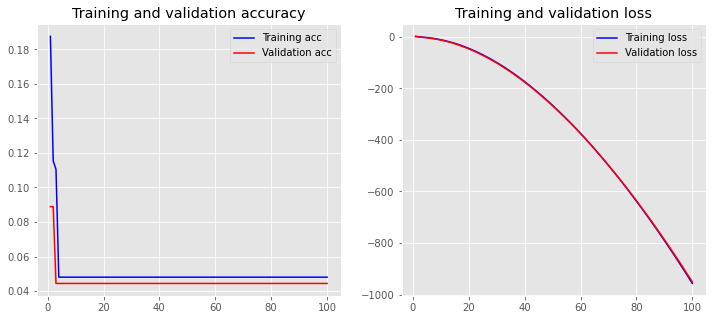

In [126]:
plot_history(history)
